In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("C:\\Users\\dell\\Downloads\\car data.csv")

In [3]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [7]:
print(data.Fuel_Type.value_counts(),"\n")
print(data.Seller_Type.value_counts(),"\n")
print(data.Transmission.value_counts(),"\n")

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64 

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64 

Manual       261
Automatic     40
Name: Transmission, dtype: int64 



In [8]:
data.Fuel_Type.replace(regex={"Petrol":"0","Diesel":"1","CNG":"2"},inplace=True)
data.Seller_Type.replace(regex={"Dealer":"0","Individual":"1"},inplace=True)
data.Transmission.replace(regex={"Manual":"0","Automatic":"1"},inplace=True)
data[["Fuel_Type","Seller_Type","Transmission"]]=data[["Fuel_Type","Seller_Type","Transmission"]].astype(int)

In [9]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [10]:
data_desc=data.describe()

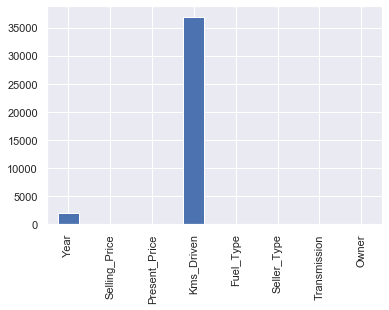

In [11]:
data_desc.loc["mean"].plot.bar()

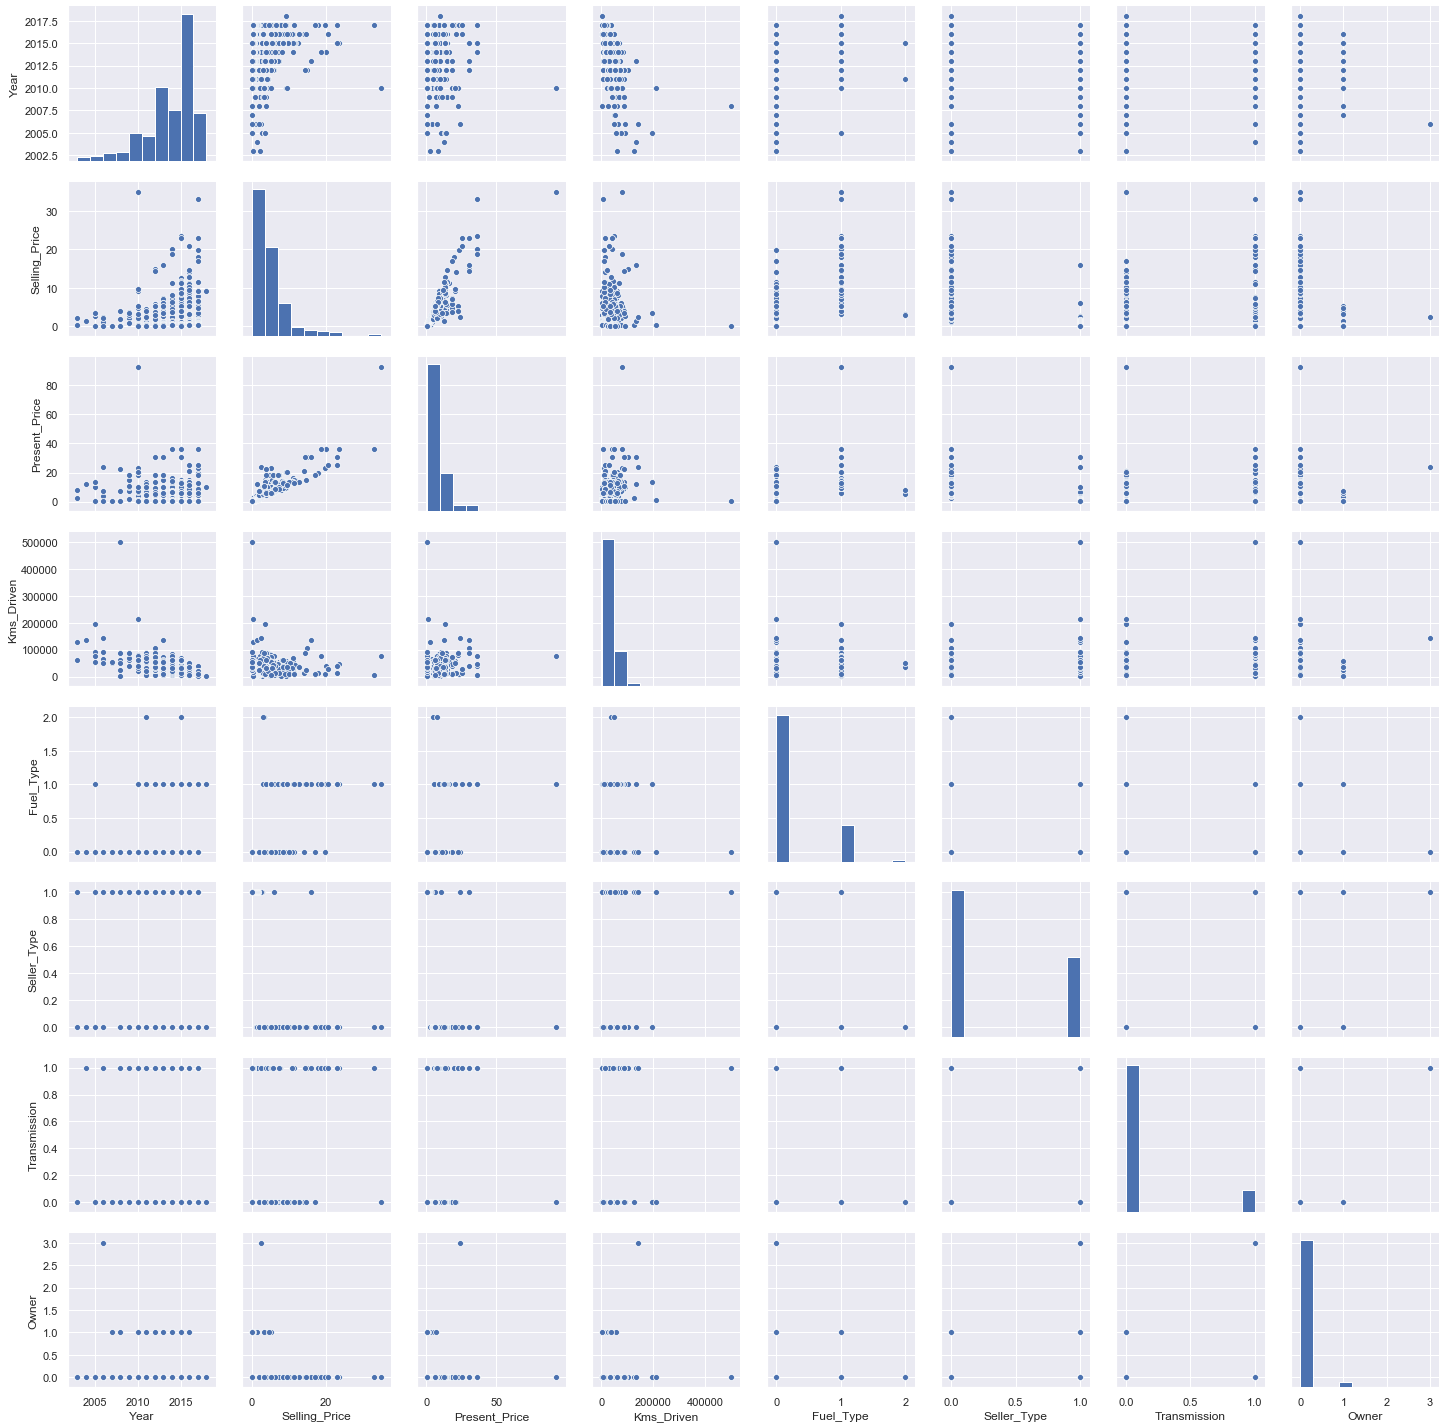

In [12]:
import seaborn as sns
sns.pairplot(data)

In [13]:
data=data.drop('Car_Name',axis=1)

IndexError: index 8 is out of bounds for axis 0 with size 8

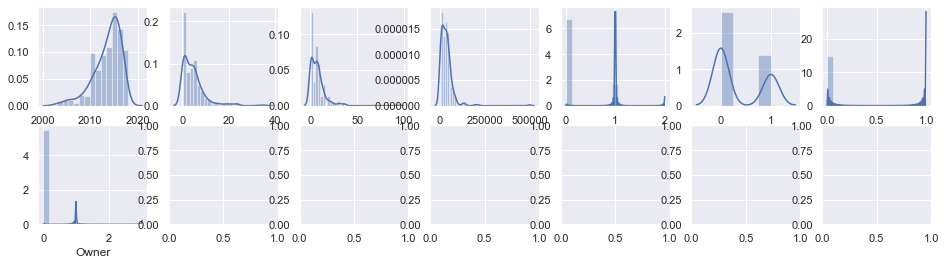

In [14]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows=rows, ncols = cols, figsize = (16, 4))

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1
        
plt.tight_layout()

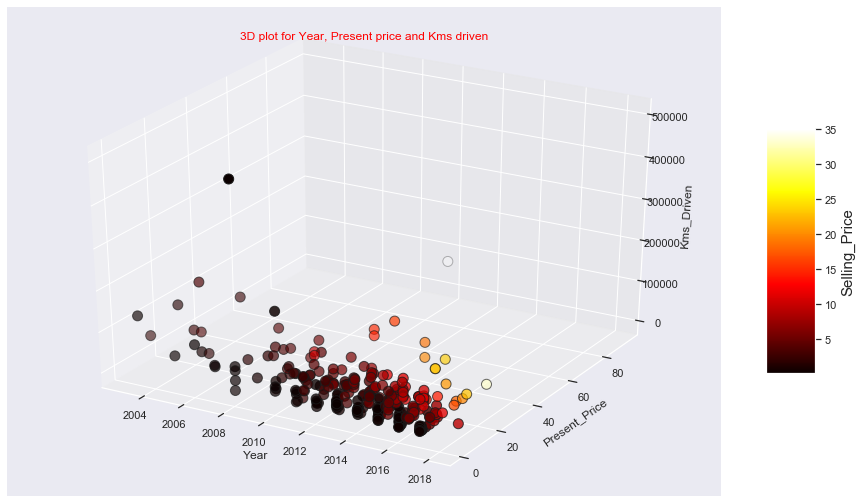

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,9))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(data["Year"],
           data["Present_Price"],
           data["Kms_Driven"],
           linewidth=1,edgecolor ="k",
           c=data["Selling_Price"],s=100,cmap="hot")

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("Selling_Price",fontsize = 15)

plt.title("3D plot for Year, Present price and Kms driven",color="red")
plt.show()

In [17]:
y=data.Selling_Price
x=data.drop(["Selling_Price"],axis=1)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 7)
x test:  (61, 7)
y train:  (240,)
y test:  (61,)


In [19]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [20]:
cv=5 # CV value
r_2 = [] # List for r 2 score
CV = [] # list for CV scores mean

# Main function for models
def model(algorithm,x_train_,y_train_,x_test_,y_test_): 
    algorithm.fit(x_train_,y_train_)
    predicts=algorithm.predict(x_test_)
    prediction=pd.DataFrame(predicts)
    R_2=r2_score(y_test_,prediction)
    cross_val=cross_val_score(algorithm,x_train_,y_train_,cv=cv)
    
    # Appending results to Lists 
    r_2.append(R_2)
    CV.append(cross_val.mean())
    
    # Printing results  
    print(algorithm,"\n") 
    print("r_2 score :",R_2,"\n")
    print("CV scores:",cross_val,"\n")
    print("CV scores mean:",cross_val.mean())
    
    # Plot for prediction vs originals
    test_index=y_test_.reset_index()["Selling_Price"]
    ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="r")
    ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
    plt.legend(loc='upper right')
    plt.title("ORIGINALS VS PREDICTIONS")
    plt.xlabel("index")
    plt.ylabel("values")
    plt.show()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) 

r_2 score : 0.8484549412089586 

CV scores: [0.89746723 0.88756505 0.83007487 0.81438137 0.75880539] 

CV scores mean: 0.8376587811919951


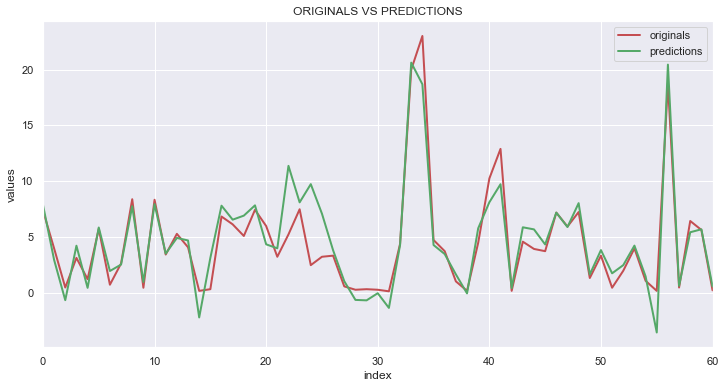

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model(lr,x_train,y_train,x_test,y_test)

In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(-3,3,num=14) # range for alpha

grid = GridSearchCV(estimator=Lasso(), param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)

print(grid.best_score_)
print(grid.best_estimator_.alpha)

C:\Users\dell\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8448893668196057
0.001


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 

r_2 score : 0.852676867799947 

CV scores: [0.89716619 0.88736684 0.830188   0.81541598 0.76120855] 

CV scores mean: 0.8382691136251514


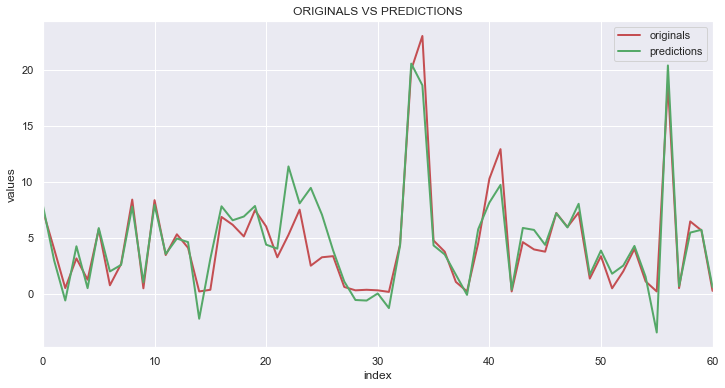

In [23]:
ls = Lasso(alpha = grid.best_estimator_.alpha, normalize = True) # applied the best estimator
model(ls,x_train,y_train,x_test,y_test)

In [24]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-3,3,num=14) # range for alpha

grid2 = GridSearchCV(estimator=Ridge(), param_grid=dict(alpha=alphas)) 
grid2.fit(x_train, y_train)

print(grid2.best_score_)
print(grid2.best_estimator_.alpha)

C:\Users\dell\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8451836594225132
0.001


Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001) 

r_2 score : 0.8495567867442751 

CV scores: [0.89841767 0.88466039 0.82899042 0.81480488 0.77521494] 

CV scores mean: 0.8404176598072969


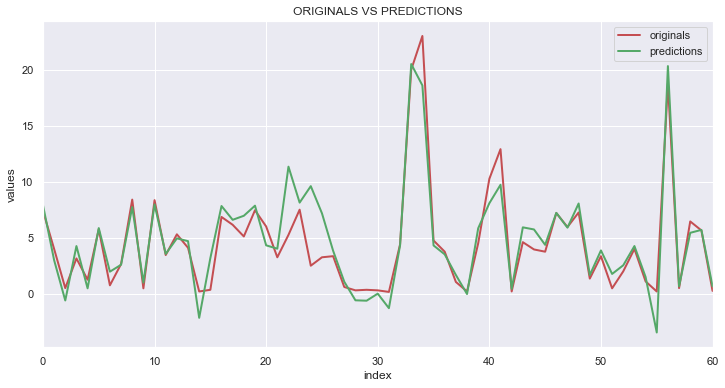

In [25]:
ridge = Ridge(alpha = 0.01, normalize = True) # applied the best estimator
model(ridge,x_train,y_train,x_test,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') 

r_2 score : 0.9579182331721231 

CV scores: [0.91874868 0.89240099 0.81056135 0.91354715 0.74276767] 

CV scores mean: 0.8556051661618385


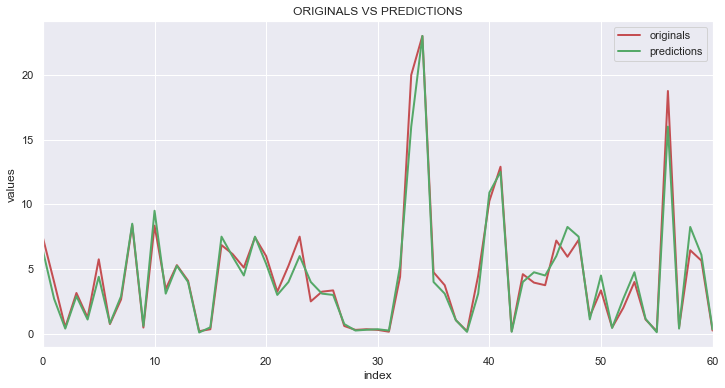

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
model(dtr,x_train,y_train,x_test,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False) 

r_2 score : 0.9010356689515354 

CV scores: [0.93408048 0.9694762  0.85502122 0.9376604  0.72016603] 

CV scores mean: 0.8832808650586859


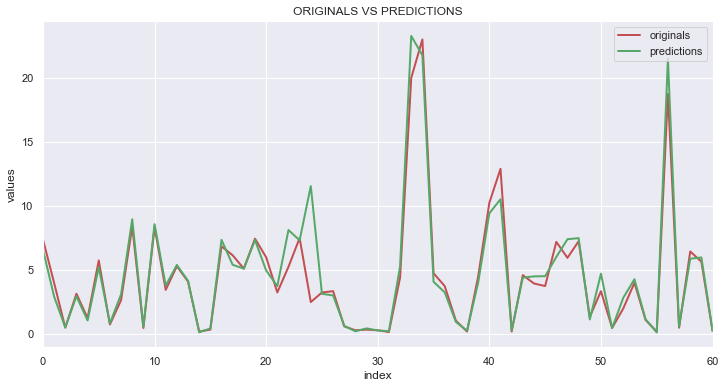

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
model(rf,x_train,y_train,x_test,y_test)

In [28]:
Model = ["LinearRegression","Lasso","Ridge","DecisionTreeRegressor","RandomForestRegressor"]
results=pd.DataFrame({'Model': Model,'R Squared': r_2,'CV score mean': CV})
results

,Model,R Squared,CV score mean
0,LinearRegression,0.848455,0.837659
1,Lasso,0.852677,0.838269
2,Ridge,0.849557,0.840418
3,DecisionTreeRegressor,0.957918,0.855605
4,RandomForestRegressor,0.901036,0.883281
